In [1]:
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils.class_weight import compute_class_weight

def set_seeds(seed=42):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

SEED = 42
set_seeds(SEED)

/opt/miniconda3/envs/embodied/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
# Acquire Data
# Collect, store, retrieve, query data

# Reading data from train.csv file
train = pd.read_csv('train.csv')

In [3]:
# Prepare data (i): exploration
# Explore data: preliminary analysis

print("Dataset shape:", train.shape)
print("\nFirst 5 rows of the dataset:")
display(train.head())

print("\nDataset info:")
train.info()

print("\nLabel distribution:")
display(train['label'].value_counts().sort_index())

print("\nMissing values check:")
display(train.isnull().sum())

print("\nBasic statistics:")
display(train.describe())

Dataset shape: (139930, 24)

First 5 rows of the dataset:


,id,country,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,label
0,1,South Africa,Apartment,Semi-Furnished,1244,224538,1990,4,8,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
1,2,South Africa,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,1,...,21914,307953,30,2510,437151,0.09,6,8,1,0
2,3,Germany,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
3,4,South Africa,Townhouse,Fully-Furnished,531,99041,2007,6,3,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0
4,5,Canada,Villa,Semi-Furnished,3169,1107368,1985,0,5,2,...,95520,793316,30,10615,314052,0.05,10,8,2,1



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139930 entries, 0 to 139929
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       139930 non-null  int64  
 1   country                  139930 non-null  object 
 2   property_type            139930 non-null  object 
 3   furnishing_status        139930 non-null  object 
 4   property_size_sqft       139930 non-null  int64  
 5   price                    139930 non-null  int64  
 6   constructed_year         139930 non-null  int64  
 7   previous_owners          139930 non-null  int64  
 8   rooms                    139930 non-null  int64  
 9   bathrooms                139930 non-null  int64  
 10  garage                   139930 non-null  int64  
 11  garden                   139930 non-null  int64  
 12  crime_cases_reported     139930 non-null  int64  
 13  legal_cases_on_property  139930 non-null  in

label
0    107610
1     32320
Name: count, dtype: int64


Missing values check:


id                         0
country                    0
property_type              0
furnishing_status          0
property_size_sqft         0
price                      0
constructed_year           0
previous_owners            0
rooms                      0
bathrooms                  0
garage                     0
garden                     0
crime_cases_reported       0
legal_cases_on_property    0
customer_salary            0
loan_amount                0
loan_tenure_years          0
monthly_expenses           0
down_payment               0
emi_to_income_ratio        0
satisfaction_score         0
neighbourhood_rating       0
connectivity_score         0
label                      0
dtype: int64


Basic statistics:


,id,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,garage,garden,crime_cases_reported,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,label
count,139930.000000,139930.000000,1.399300e+05,139930.000000,139930.000000,139930.000000,139930.000000,139930.000000,139930.000000,139930.000000,...,139930.000000,1.399300e+05,139930.000000,139930.000000,1.399300e+05,139930.000000,139930.000000,139930.000000,139930.000000,139930.000000
mean,69965.500000,3196.275381,1.215876e+06,1991.456528,3.004345,4.514300,2.757715,0.499150,0.498656,1.230051,...,46440.850289,7.603534e+05,19.988101,10551.103916,4.555228e+05,0.195672,5.500908,5.503931,5.495684,0.230973
std,40394.455921,1612.606112,8.243345e+05,18.496066,2.001356,2.294085,1.839882,0.500001,0.500000,1.186716,...,27972.357740,5.499271e+05,7.075541,5430.204202,3.626979e+05,0.219540,2.877524,2.867538,2.871748,0.421456
min,1.000000,400.000000,5.628800e+04,1960.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,2006.000000,2.350400e+04,10.000000,500.000000,9.996000e+03,0.000000,1.000000,1.000000,1.000000,0.000000
25%,34983.250000,1805.000000,5.670900e+05,1975.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,...,21360.000000,3.379288e+05,15.000000,5760.000000,1.851872e+05,0.070000,3.000000,3.000000,3.000000,0.000000
50%,69965.500000,3192.000000,1.023482e+06,1991.000000,3.000000,5.000000,2.000000,0.000000,0.000000,1.000000,...,41315.000000,6.263160e+05,20.000000,10495.000000,3.567975e+05,0.130000,5.000000,5.000000,5.000000,0.000000
75%,104947.750000,4587.000000,1.726123e+06,2007.000000,5.000000,7.000000,4.000000,1.000000,1.000000,2.000000,...,70598.750000,1.059142e+06,25.000000,15250.000000,6.254765e+05,0.240000,8.000000,8.000000,8.000000,0.000000
max,139930.000000,6000.000000,4.202732e+06,2023.000000,6.000000,8.000000,8.000000,1.000000,1.000000,9.000000,...,100000.000000,3.520150e+06,30.000000,20000.000000,2.492723e+06,3.310000,10.000000,10.000000,10.000000,1.000000


In [4]:
# Prepare data (ii): data preprocessing
# Data integration, Data cleaning, Feature extraction, Feature scaling

# Load test data for preprocessing
test_df = pd.read_csv('test.csv')
print("test.csv loaded successfully.")
test_ids = test_df['id']

# Define Features
print("1. Defining features...")
categorical_features = ['country', 'property_type', 'furnishing_status']
numerical_features = [
    'property_size_sqft', 'price', 'constructed_year', 'previous_owners', 
    'rooms', 'bathrooms', 'garage', 'garden', 'crime_cases_reported', 
    'legal_cases_on_property', 'customer_salary', 'loan_amount', 
    'loan_tenure_years', 'monthly_expenses', 'down_payment', 
    'emi_to_income_ratio', 'satisfaction_score', 'neighbourhood_rating', 
    'connectivity_score'
]

# Separate features and target
X = train.drop(['id', 'label'], axis=1)
y = train['label']
X_test_kaggle = test_df.drop('id', axis=1)

# Split into Training (80%) and Validation (20%) Sets
print("2. Splitting train.csv into 80% training and 20% validation sets...")
X_train, X_val, y_train, y_val = train_test_split(
    X, y, 
    test_size=0.2,    
    random_state=SEED,  
    stratify=y        
)
print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")

# Create and Apply Preprocessing Pipeline
print("3. Creating data preprocessing pipeline...")
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

print("4. Preprocessing data...")
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_kaggle_processed = preprocessor.transform(X_test_kaggle)
input_dim = X_train_processed.shape[1]
print(f"Data preprocessing complete. DNN input dimension is: {input_dim}")

# Analyze data
# Build models, Select analytical techniques

print("5. Building DNN model...")
tf.keras.backend.clear_session()
model = Sequential([
    Input(shape=(input_dim,), name='Input_Layer'),
    Dense(128, activation='relu', name='Hidden_Layer_1'),
    Dropout(0.3, name='Dropout_1'),
    Dense(64, activation='relu', name='Hidden_Layer_2'),
    Dropout(0.2, name='Dropout_2'),
    Dense(32, activation='relu', name='Hidden_Layer_3'),
    Dense(1, activation='sigmoid', name='Output_Layer')
])
model.summary()

print("6. Compiling model...")
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
        'accuracy', 
        tf.keras.metrics.AUC(name='auc'),
        tf.keras.metrics.F1Score(average='macro', name='f1_macro')
    ]
)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_f1_macro',
    patience=10,
    mode='max',
    verbose=1,
    restore_best_weights=True
)

print("7. Starting model training...")
history = model.fit(
    X_train_processed,       
    y_train,                 
    epochs=100,            
    batch_size=64,
    validation_data=(X_val_processed, y_val),
    # class_weight=class_weights_dict, 
    callbacks=[early_stopping],
    verbose=1
)

print("\n8. Evaluating the best model on the 20% validation set...")
val_metrics = model.evaluate(X_val_processed, y_val, verbose=0)
metrics_names = model.metrics_names
for name, value in zip(metrics_names, val_metrics):
    print(f"   Validation {name}: {value:.4f}")
print(f"   Validation AUC: {val_metrics[2]:.4f}")
print(f"   Validation Macro-F1: {val_metrics[3]:.4f}")

print("\n9. Predicting on the Kaggle test set (test.csv)...")
y_pred_proba = model.predict(X_test_kaggle_processed)
y_pred_binary = (y_pred_proba > 0.5).astype(int).flatten()

print("10. Creating submission.csv...")
submission_df = pd.DataFrame({'id': test_ids, 'label': y_pred_binary})
submission_df.to_csv('submission.csv', index=False)
print("\n'submission.csv' has been successfully generated.")

test.csv loaded successfully.
1. Defining features...
2. Splitting train.csv into 80% training and 20% validation sets...
Training set size: 111944
Validation set size: 27986
3. Creating data preprocessing pipeline...
4. Preprocessing data...
Data preprocessing complete. DNN input dimension is: 41
5. Building DNN model...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden_Layer_1 (Dense)          │ (None, 128)            │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_3 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,745 (61.50 KB)

 Trainable params: 15,745 (61.50 KB)

 Non-trainable params: 0 (0.00 B)

6. Compiling model...
7. Starting model training...
Epoch 1/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 635us/step - accuracy: 0.9064 - auc: 0.9512 - f1_macro: 0.4093 - loss: 0.1902 - val_accuracy: 0.9958 - val_auc: 1.0000 - val_f1_macro: 0.6660 - val_loss: 0.0097
Epoch 2/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 574us/step - accuracy: 0.9946 - auc: 0.9998 - f1_macro: 0.6905 - loss: 0.0139 - val_accuracy: 0.9987 - val_auc: 1.0000 - val_f1_macro: 0.7691 - val_loss: 0.0038
Epoch 3/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 538us/step - accuracy: 0.9972 - auc: 0.9999 - f1_macro: 0.7763 - loss: 0.0076 - val_accuracy: 0.9989 - val_auc: 1.0000 - val_f1_macro: 0.7946 - val_loss: 0.0031
Epoch 4/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - accuracy: 0.9979 - auc: 0.9999 - f1_macro: 0.8111 - loss: 0.0054 - val_accuracy: 0.9982 - val_auc: 1.0000 - val_f1_macro: 0.8381 - val_loss: 0.0037
Epoch 5/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 1s 529us/step - accuracy: 0.9979 - auc: 1.0000 - f1_macro: 0.8352 - loss: 0.0

Plotting training history...


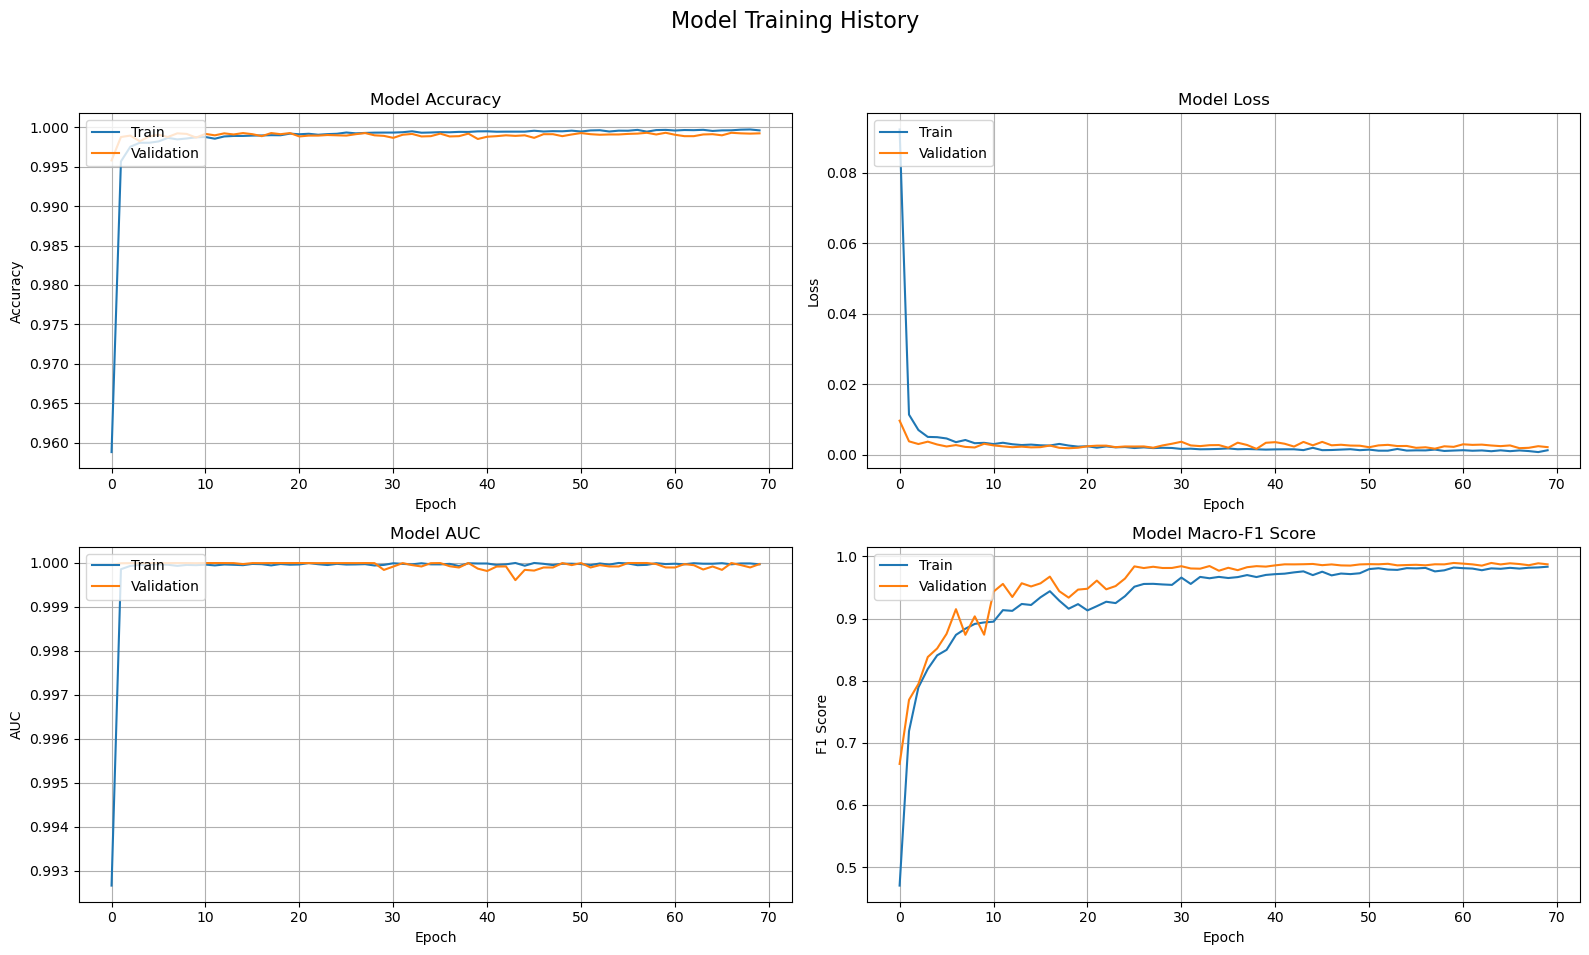

In [5]:
# Report
# Data and result visualization

print("Plotting training history...")

if 'history' in locals() and history is not None:
    # Create a figure with subplots
    fig, axs = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Model Training History', fontsize=16)

    # Plot training & validation accuracy values
    axs[0, 0].plot(history.history['accuracy'])
    axs[0, 0].plot(history.history['val_accuracy'])
    axs[0, 0].set_title('Model Accuracy')
    axs[0, 0].set_ylabel('Accuracy')
    axs[0, 0].set_xlabel('Epoch')
    axs[0, 0].legend(['Train', 'Validation'], loc='upper left')
    axs[0, 0].grid(True)

    # Plot training & validation loss values
    axs[0, 1].plot(history.history['loss'])
    axs[0, 1].plot(history.history['val_loss'])
    axs[0, 1].set_title('Model Loss')
    axs[0, 1].set_ylabel('Loss')
    axs[0, 1].set_xlabel('Epoch')
    axs[0, 1].legend(['Train', 'Validation'], loc='upper left')
    axs[0, 1].grid(True)

    # Plot training & validation AUC values
    axs[1, 0].plot(history.history['auc'])
    axs[1, 0].plot(history.history['val_auc'])
    axs[1, 0].set_title('Model AUC')
    axs[1, 0].set_ylabel('AUC')
    axs[1, 0].set_xlabel('Epoch')
    axs[1, 0].legend(['Train', 'Validation'], loc='upper left')
    axs[1, 0].grid(True)

    # Plot training & validation F1-score values
    axs[1, 1].plot(history.history['f1_macro'])
    axs[1, 1].plot(history.history['val_f1_macro'])
    axs[1, 1].set_title('Model Macro-F1 Score')
    axs[1, 1].set_ylabel('F1 Score')
    axs[1, 1].set_xlabel('Epoch')
    axs[1, 1].legend(['Train', 'Validation'], loc='upper left')
    axs[1, 1].grid(True)

    # Adjust layout and show the plots
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
else:
    print("Could not find 'history' object. Please ensure the model training cell has been run.")